In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
dataset_path = './datasets/creditcard.csv'
df = pd.read_csv(dataset_path)

dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

bias = np.ones((X.shape[0], 1))
X_b = np.concatenate((bias, X), axis=1)

### One-hot encoding


In [9]:
# get all unique classes
num_unique_class = np.unique(y)
y_encoded = np.eye(num_unique_class.shape[0])[y]

### Split data

In [10]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=2,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

### Normalize data

In [11]:
normalizer = StandardScaler()

# only get 1: because don't need to normalize bias
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [12]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z / exp_z.sum(axis=1)[:, None]

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    
    return y_hat

def compute_loss(y_hat, y):
    n = y.size
    
    return (-1 / n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
    n = y.size
    
    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

    return acc

In [47]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]
n_classes = np.unique(y, axis=0).shape[0]

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, n_classes)
)

train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)
        
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs) 

    train_accs.append(train_batch_acc)
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print(f'Epoch {epoch + 1}/{epochs} - Train loss: {train_batch_loss:.3f} - Train acc: {train_batch_acc:.3f} - Val loss: {val_batch_loss:.3f} - Val acc: {val_batch_acc:.3f}')



Epoch 1/30 - Train loss: 0.300 - Train acc: 0.741 - Val loss: 0.297 - Val acc: 0.743
Epoch 2/30 - Train loss: 0.176 - Train acc: 0.909 - Val loss: 0.174 - Val acc: 0.909
Epoch 3/30 - Train loss: 0.115 - Train acc: 0.971 - Val loss: 0.113 - Val acc: 0.972
Epoch 4/30 - Train loss: 0.081 - Train acc: 0.987 - Val loss: 0.080 - Val acc: 0.987
Epoch 5/30 - Train loss: 0.062 - Train acc: 0.993 - Val loss: 0.061 - Val acc: 0.993
Epoch 6/30 - Train loss: 0.049 - Train acc: 0.996 - Val loss: 0.049 - Val acc: 0.996
Epoch 7/30 - Train loss: 0.041 - Train acc: 0.997 - Val loss: 0.041 - Val acc: 0.998
Epoch 8/30 - Train loss: 0.035 - Train acc: 0.998 - Val loss: 0.035 - Val acc: 0.998
Epoch 9/30 - Train loss: 0.031 - Train acc: 0.999 - Val loss: 0.031 - Val acc: 0.999
Epoch 10/30 - Train loss: 0.028 - Train acc: 0.999 - Val loss: 0.027 - Val acc: 0.999
Epoch 11/30 - Train loss: 0.025 - Train acc: 0.999 - Val loss: 0.025 - Val acc: 0.999
Epoch 12/30 - Train loss: 0.023 - Train acc: 0.999 - Val loss: 

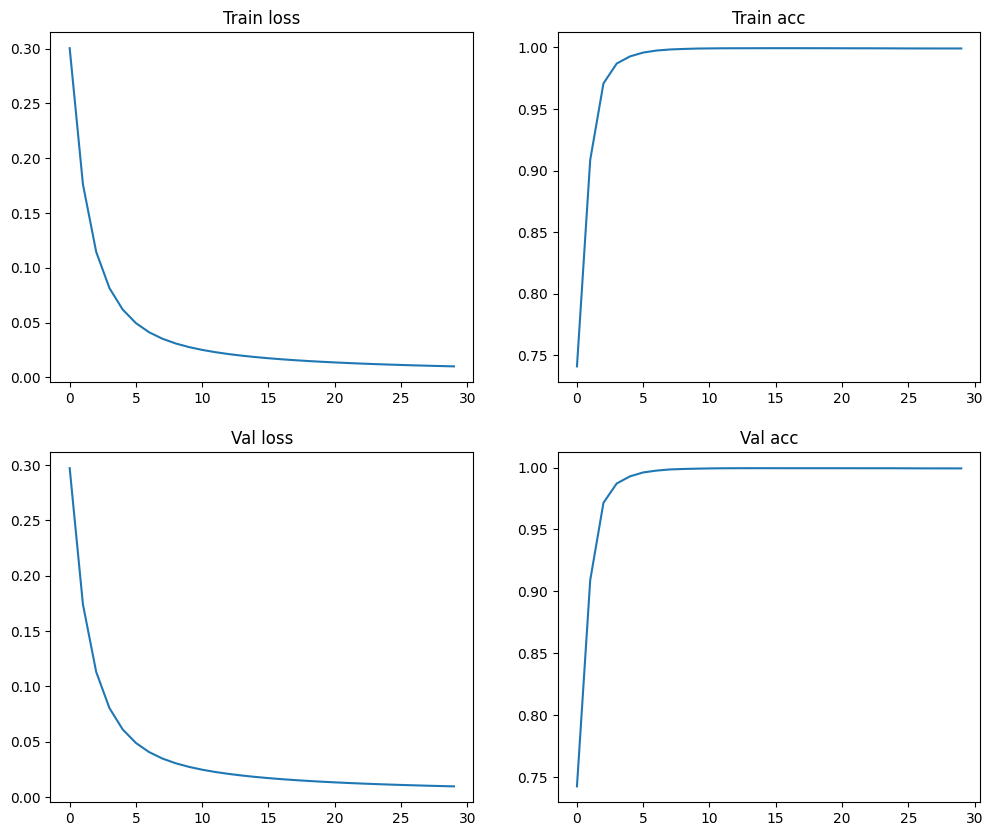

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set_title('Train loss')
ax[0, 1].plot(train_accs)
ax[0, 1].set_title('Train acc')
ax[1, 0].plot(val_losses)
ax[1, 0].set_title('Val loss')
ax[1, 1].plot(val_accs)
ax[1, 1].set_title('Val acc')
plt.show()

In [49]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print(f'Val set accuracy: {val_set_acc:.3f} - Test set accuracy: {test_set_acc:.3f}') 

Val set accuracy: 0.999 - Test set accuracy: 0.999
